### fit( )과 fit_transform( )의 차이
- fit_transform()은 말그대로 fit()한 다음에 transform()하는 것이다.
    - e.g. StandardScaler에서..
    - fit()은 정규화를 하기 위해 평균μ과 표준편차σ를 계산하는 작업이고,
    - transform()은 정규화 작업을 수행해주는 것이다.
    <br><br>
- 왜 fit_transform()은 training data에 사용하고, transform()은 test data에만 사용하는 걸까?
    - 왜냐면.. fit_transform()으로 train data의 mean과 variance를 학습한다.
    - 그리고 이 fit을 통해 Scaler 객체에 저장된 parameter값은 test data를 scaling하는 데 사용된다.
        - 만약 test data에도 fit_transform()한다면, 우리가 사용하는 모델은 test data도 학습하게 되는 것이다.
        - 우리가 원하는 건 "train data를 통해 데이터의 패턴을 학습하고 test data를 통해 처음 보는 데이터에 대해서도 일반화된 성능을 얻는 것"이다.

# Pre-processing, Scaling, and SVC

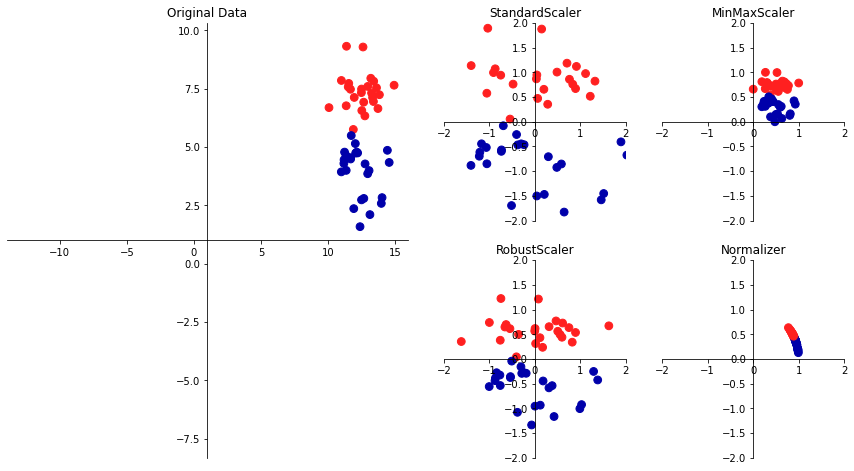

In [1]:
import mglearn
mglearn.plots.plot_scaling()

# (왼쪽) 두 개의 특성을 인위적으로 만든 이진 분류 데이터셋을
    # (오른쪽) 데이터를 표준화/정규화하는 네 가지 방법이다.

# StandardScaler: 각 특성의 평균을 0 분산을 1로 변경하여 모든 특성이 같은 크기를 가지게 한다.
# RobustScaler: 특성들이 같은 스케일을 갖게 된다는 통계적 측면에선 비슷하지만, 중간값과 사분위값을 사용한다.
# MinMaxScaler: 모든 특성이 0과 1사이에 위치하도록 데이터를 변경한다.
# Normalizer: 벡터의 유클리디안 길이가 1이 되도록 데이터 포인트를 조정한다. (지름이 1인 구에 데이터 포인트를 투영한다.) => 벡터의 길이는 상관없고 데이터의 방향이 중요할 때 많이 사용된다.

ㅇ


In [2]:
# 유방암 데이터셋 로드
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

print(X_train.shape)
print(X_test.shape)
# 569개의 데이터 포인트를 426개의 훈련세트, 143개의 테스트 세트로 나눴다.

(426, 30)
(143, 30)


In [3]:
# MinMaxScaler로 전처리 후 속성값 확인하기
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# MinMaxScaler의 fit 메서드는 훈련세트에 있는 특성마다 최대/최소값을 계산한다.
scaler.fit(X_train)

# fit 메서드로 학습한 변환을 적용하려면 스케일 객체의 transform 메서드를 사용한다.
X_train_scaled = scaler.transform(X_train)

print("변환된 후 크기: {}".format(X_train_scaled.shape)) # 개수에는 변화 없음

print("스케일 조정 전 특성별 최소값: {}".format(X_train.min(axis=0)))
print("스케일 조정 전 특성별 최대값: {}".format(X_train.max(axis=0)))
print("스케일 조정 후 특성별 최소값: {}".format(X_train_scaled.min(axis=0)))
print("스케일 조정 후 특성별 최대값: {}".format(X_train_scaled.max(axis=0)))

변환된 후 크기: (426, 30)
스케일 조정 전 특성별 최소값: [6.981e+00 9.710e+00 4.379e+01 1.435e+02 5.263e-02 1.938e-02 0.000e+00
 0.000e+00 1.060e-01 4.996e-02 1.115e-01 3.628e-01 7.570e-01 7.228e+00
 1.713e-03 2.252e-03 0.000e+00 0.000e+00 7.882e-03 8.948e-04 7.930e+00
 1.202e+01 5.041e+01 1.852e+02 7.117e-02 2.729e-02 0.000e+00 0.000e+00
 1.565e-01 5.504e-02]
스케일 조정 전 특성별 최대값: [2.811e+01 3.381e+01 1.885e+02 2.501e+03 1.447e-01 3.114e-01 4.268e-01
 2.012e-01 3.040e-01 9.744e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 2.333e-02 1.064e-01 3.960e-01 5.279e-02 6.146e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 1.058e+00 1.252e+00 2.903e-01
 6.638e-01 2.075e-01]
스케일 조정 후 특성별 최소값: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
스케일 조정 후 특성별 최대값: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [4]:
# 이 데이터에 SVM을 적용하려면 테스트 세트도 변환해야 한다.
    # train set에만 fit하고, test set에는 transform만 사용한다.

scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("스케일 조정 후 특성별 최소값: \n{}".format(X_test_scaled.min(axis=0)))
print("스케일 조정 후 특성별 최소값: \n{}".format(X_test_scaled.max(axis=0)))

# test set의 최대/최소값이 1과 0이 아닌 것은 자연스런 현상이다.

스케일 조정 후 특성별 최소값: 
[ 0.03540158  0.04190871  0.02895446  0.01497349  0.14260888  0.04999658
  0.          0.          0.07222222  0.00589722  0.00105015 -0.00057494
  0.00067851 -0.0007963   0.05148726  0.01434497  0.          0.
  0.04195752  0.01113138  0.03678406  0.01252665  0.03366702  0.01400904
  0.08531995  0.01833687  0.          0.          0.00749064  0.02367834]
스케일 조정 후 특성별 최소값: 
[0.76809125 1.22697095 0.75813696 0.64750795 1.20310633 1.11643038
 0.99906279 0.90606362 0.93232323 0.94903117 0.45573058 0.72623944
 0.48593507 0.31641282 1.36082713 1.2784499  0.36313131 0.77476795
 1.32643996 0.72672498 0.82106012 0.87553305 0.77887345 0.67803775
 0.78603975 0.87843331 0.93450479 1.0024113  0.76384782 0.58743277]


### 데이터 전처리 전후의 성능 비교

In [5]:
# 전처리 전 성능
from sklearn.svm import SVC

svm = SVC(C=100)
svm.fit(X_train, y_train)

print("훈련 세트 정확도: {:.3f}".format(svm.score(X_train,y_train)))
print("테스트 세트 정확도: {:.3f}".format(svm.score(X_test,y_test)))

훈련 세트 정확도: 0.941
테스트 세트 정확도: 0.944


In [6]:
# MinMaxScaler 전처리 후 성능

svm = SVC(C=100)
svm.fit(X_train_scaled, y_train)

print("스케일 조정된 훈련 세트 정확도 : {:.3f}".format(svm.score(X_train_scaled,y_train)))
print("스케일 조정된 테스트 세트 정확도 : {:.3f}".format(svm.score(X_test_scaled,y_test)))

스케일 조정된 훈련 세트 정확도 : 1.000
스케일 조정된 테스트 세트 정확도 : 0.965


In [7]:
# StandardScaler 전처리 후 성능
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()
standard_scaler.fit(X_train)
X_train_scaled_standard = standard_scaler.transform(X_train)
X_test_scaled_standard = standard_scaler.transform(X_test)

svm = SVC(C=100)
svm.fit(X_train_scaled_standard, y_train)

print("스케일 조정된 훈련 세트 정확도 : {:.3f}".format(svm.score(X_train_scaled_standard,y_train)))
print("스케일 조정된 테스트 세트 정확도 : {:.3f}".format(svm.score(X_test_scaled_standard,y_test)))

스케일 조정된 훈련 세트 정확도 : 1.000
스케일 조정된 테스트 세트 정확도 : 0.958


# PCA
- PCA 알고리즘은 성분1이라고 쓰여있는 분산이 가장 큰 방향을 찾는다.
    - 이 방향(벡터)는 이 성분1에 대한 가장 많은 정보를 담고 있는 방향이다.
- 그 다음 첫번째 방향과 직각인 방향 중에 가장 많은 정보를 담는 방향을 찾는다. (component 2)

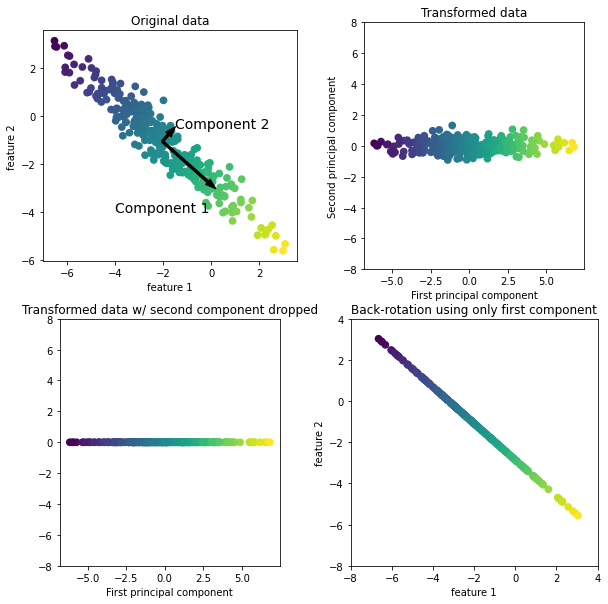

In [8]:
import mglearn
mglearn.plots.plot_pca_illustration()

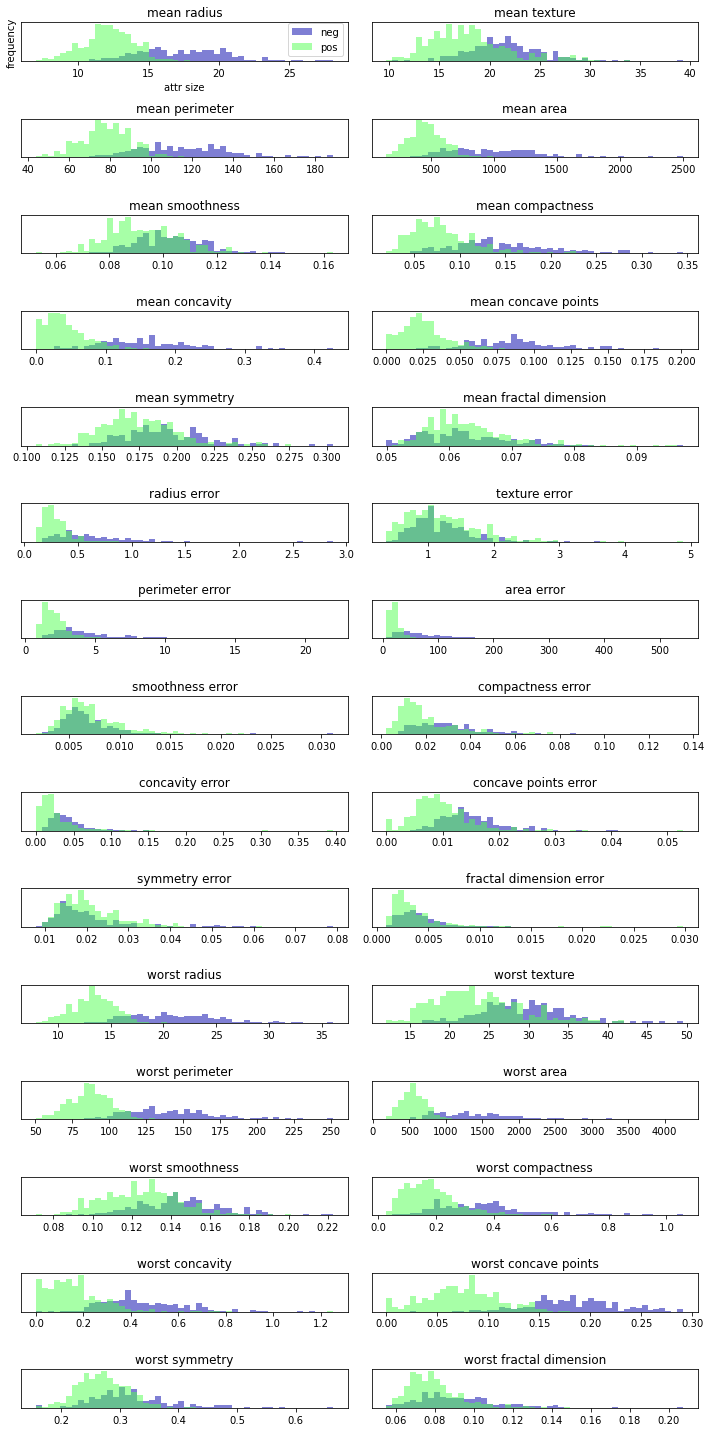

In [9]:
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
import numpy as np

cancer = load_breast_cancer()

fig, axes = plt.subplots(15, 2, figsize=(10,20))
malignant = cancer.data[cancer.target==0]
benign = cancer.data[cancer.target==1]

ax = axes.ravel()
for i in range(30):
    _, bins = np.histogram(cancer.data[:,i], bins=50)
    ax[i].hist(malignant[:,i], bins=bins, color=mglearn.cm3(0), alpha=.5)
    ax[i].hist(benign[:,i], bins=bins, color=mglearn.cm3(2), alpha=.5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())
ax[0].set_xlabel("attr size")
ax[0].set_ylabel("frequency")
ax[0].legend(["neg", "pos"], loc="best")
fig.tight_layout()
plt.show()

# !!! 예를 들어...
    # 아래의 worst concave points 특성은 두 히스토그램이 확실히 구분되기 때문에 매우 유용한 특성이다.
    # 그러나.. 이 그래프는 특성 간의 상호작용에 대해선 전혀 알려주지 못한다.

원본 데이터 형태 : (569, 30)
축소된 데이터 형태 : (569, 2)


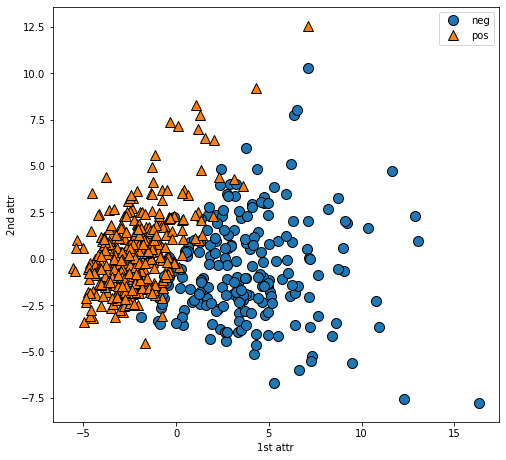

In [10]:
# pca 적용 전 StandardScaler
import matplotlib.pyplot as plt
import mglearn
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler

cancer = load_breast_cancer()

standard_scaler = StandardScaler()
X_scaled = standard_scaler.fit_transform(cancer.data)


# PCA 객체 생성, fit메서드로 주성분 찾고, transform메서드로 데이터를 회전시키고 차원을 축소한다.
from sklearn.decomposition import PCA

pca = PCA(n_components=2)   # 데이터 첫 2개의 주성분만 유지한다.
pca.fit(X_scaled)   # PCA 모델 만들기
X_pca = pca.transform(X_scaled)  # 처음 두 개의 주성분을 사용해 데이터 변환

print("원본 데이터 형태 : {}".format(str(X_scaled.shape)))
print("축소된 데이터 형태 : {}".format(str(X_pca.shape)))


# principal component 2개를 사용한 산점도 그리기
plt.figure(figsize=(8,8))
mglearn.discrete_scatter(X_pca[:,0], X_pca[:,1], cancer.target)
plt.legend(['neg', 'pos'], loc='best')
plt.gca().set_aspect("equal")
plt.xlabel("1st attr")
plt.ylabel("2nd attr")
plt.show()

# 두 클래스가 2차원 공간에서 꽤 잘 분류된다.
    # PCA의 단점은 그래프의 두 축을 해석하기 쉽지 않다는 점이다.
    # 주성분은 원본 데이터에 있는 어떤 방향에 대응하는 여러 특성이 조합된 형태이다.

PCA 주성분: (2, 30)
PCA 주성분: [[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
   0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
  -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
   0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
   0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]]


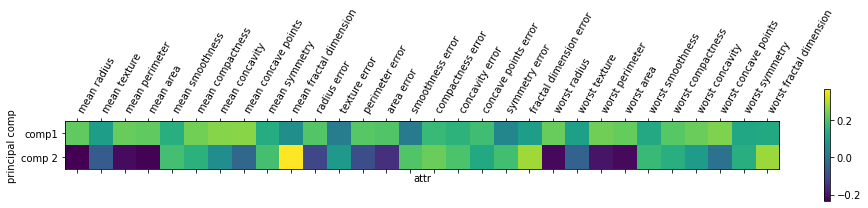

In [11]:
# 주성분 데이터와 주성분 히트맵
print("PCA 주성분: {}".format(pca.components_.shape))
print("PCA 주성분: {}".format(pca.components_))

plt.matshow(pca.components_, cmap="viridis")
plt.yticks([0,1], ["comp1","comp 2"])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)), cancer.feature_names, rotation=60, ha="left")
plt.xlabel("attr")
plt.ylabel("principal comp")
plt.show()

# 첫번째 주성분의 모든 특성은 부호가 같다. => 모든 특성 사이에 공통의 상호관계가 있다. => 한 특성의 값이 커지면 다른 값들도 높아질 것으로 예상된다.
# 두 번째 주성분의 특성은 부호가 섞여있다. => 2번째 주성분의 축이 가지는 의미는 파악하기 힘들다.

# 다양한 그래프 그리기

[참고 document](https://pandas.pydata.org/pandas-docs/stable/visualization.html)

<AxesSubplot:xlabel='A'>

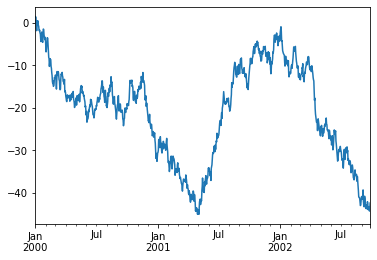

<Figure size 432x288 with 0 Axes>

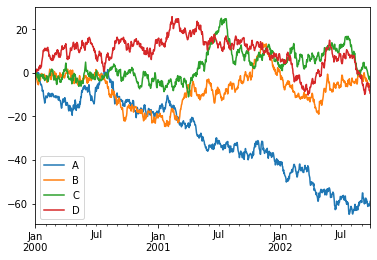

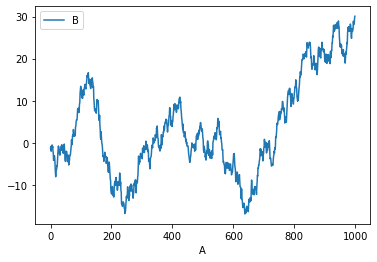

In [12]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# The plot method on Series and DataFrame is just a simple wrapper around plt.plot():
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts = ts.cumsum()
ts.plot()

# plot() is a convenience to plot all of the columns with labels:
df = pd.DataFrame(np.random.randn(1000,4), index=ts.index, columns=list('ABCD'))
df = df.cumsum()
plt.figure(); df.plot();

# plot one column versus another using x and y keywords in plot():
df3 = pd.DataFrame(np.random.randn(1000,2), columns=['B','C']).cumsum()
df3['A'] = pd.Series(list(range(len(df))))
df3.plot(x='A', y='B')

# Matplotlib 정리

matplotlib 사용법은 크게 두 가지가 있다.
1. stateless API (object-based)
    - 내가 지정한 figure, 내가 지정한 ax에 그림을 그리는 방법
    - figure와 ax를 직접 만들어야하고, 그렇기에 객체지향적 특성을 가짐
2. stateful API (state-based)
    - 현재의 figure, 현재의 ax에 그림을 그리는 방법
    - 직접 figure와 ax를 지정하지 않고, 자동으로 현재의 figure와 ax를 찾아 그곳에 plotting하는 방식이다.
    - 기존에는 원래 stateless 방식만 있었는데, 좀 더 쉬운 사용을 위해 stateful이 생겨났다. 그리고 이 stateful 방식을 이용할 수 있는 모듈이 matplotlib.pyplot이다. 그냥 matplotlib은 stateless만 가능하다.
<br><br>\** figure: 그래프를 그릴 공간(종이) / ax(axes): 그 공간 중 지금 내가 사용할 부분



### stateless API

- [posting 출처1](https://hwi-doc.tistory.com/entry/matplotlib-완벽-정리)
- [posting 출처2](github.com/Apress/numerical-python-second-ed)

```python
# figure와 ax 객체를 생성하는 법

fig=plt.figure()  # ax없는 빈 figure 생성 (후에 ax를 추가해줘야 함)
fig,ax = plt.subplots()  # 하나의 ax만을 가지는 하나의 figure 생성
fig,axes = plt.subplots(2,2)  # 4개(2*2)의 axes를 가지는 하나의 figure을 생성한다.
```

/var/folders/hh/14z5pty92_s51gdc2n406w6w0000gn/T/ipykernel_4138/1361151173.py:13: MatplotlibDeprecationWarning: Calling add_axes() without argument is deprecated since 3.3 and will be removed two minor releases later. You may want to use add_subplot() instead.
  ax = fig.add_axes(left=0.1, bottom=0.1, width=0.8, height=0.8, facecolor="#e1e1e1")


Text(0, 0.5, 'y')

<Figure size 576x180 with 0 Axes>

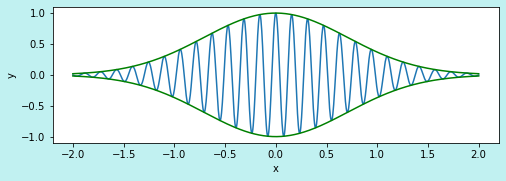

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 데이터 준비
x = np.linspace(-2, 2, 1000)
y1 = np.cos(40 * x)
y2 = np.exp(-x**2)

# 방법 1: 빈 figure를 생성하고 그 안에 ax를 추가하기
fig = plt.figure(figsize=(8, 2.5), facecolor="#c1f1f1")   # ax가 없는 빈 figure 생성
ax = fig.add_axes(left=0.1, bottom=0.1, width=0.8, height=0.8, facecolor="#e1e1e1")

# 방법 2: 하나의 ax를 가지는 하나의 figure 생성 (ax의 색깔 지정 못함)
fig, ax = plt.subplots(figsize=(8, 2.5), facecolor="#c1f1f1")

# 그래프 그리기
ax.plot(x, y1 * y2)  # ax에 plotting
ax.plot(x, y2, 'g')
ax.plot(x, -y2, 'g')
ax.set_xlabel("x")
ax.set_ylabel("y")

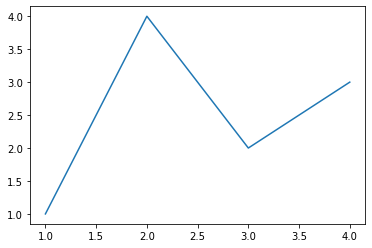

In [14]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# the simplest way of creating a figure with an axes is using pyplot.subplots => we can then use Axes.plot to draw some data on the axes:
fig, ax = plt.subplots()  # create a figure containing a single axes.
ax.plot([1,2,3,4,], [1,4,2,3])

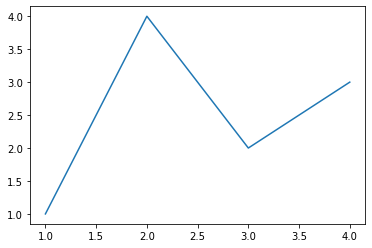

In [15]:
# 근데 위에처럼 axes를 따로 지정하지 않고도 "현재 axes"에 그리는 법이 있다.
plt.plot([1,2,3,4],[1,4,2,3])

# Parts of a Figure
<img src="https://matplotlib.org/stable/_images/anatomy.png">

<Figure size 432x288 with 0 Axes>

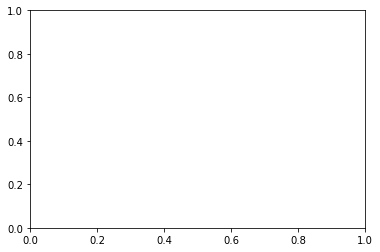

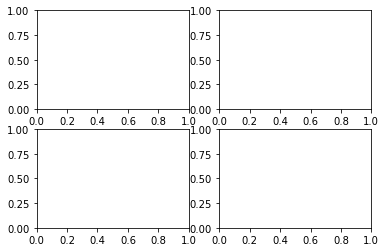

In [16]:
# creating a figure
fig = plt.figure() # an empty figure with no Axes
fig, ax = plt.subplots() # a figure with a single Axes
fig, axs = plt.subplots(2,2) # a figure with a 2x2 grid of Axes

# 나중에 axes를 추가하는 것도 가능


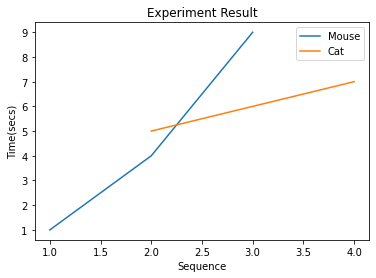

In [17]:
plt.plot([1,2,3], [1,4,9])
plt.plot([2,3,4], [5,6,7])
plt.xlabel('Sequence')
plt.ylabel('Time(secs)')
plt.title('Experiment Result')
plt.legend(['Mouse', 'Cat'])
plt.show()

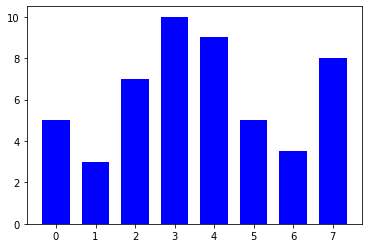

In [18]:
y = [5, 3, 7, 10, 9, 5, 3.5, 8]
x = range(len(y))
plt.bar(x, y, width=0.7, color="blue")
plt.show()